In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
crash_df = sns.load_dataset('car_crashes')
crash_df.head()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA


# Matrix Plots
---
### 1. Heatmaps  
Columns also being used as rows  

#### 1.1 Using CORR function

In [5]:
# 1. Turning indexes (rows) into columns
crash_mx = crash_df.corr()
crash_mx

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses
total,1.000000,0.611548,0.852613,0.827560,0.956179,-0.199702,-0.036011
speeding,0.611548,1.000000,0.669719,0.588010,0.571976,-0.077675,-0.065928
alcohol,0.852613,0.669719,1.000000,0.732816,0.783520,-0.170612,-0.112547
not_distracted,0.827560,0.588010,0.732816,1.000000,0.747307,-0.174856,-0.075970
no_previous,0.956179,0.571976,0.783520,0.747307,1.000000,-0.156895,-0.006359
ins_premium,-0.199702,-0.077675,-0.170612,-0.174856,-0.156895,1.000000,0.623116
ins_losses,-0.036011,-0.065928,-0.112547,-0.075970,-0.006359,0.623116,1.000000


<AxesSubplot:>

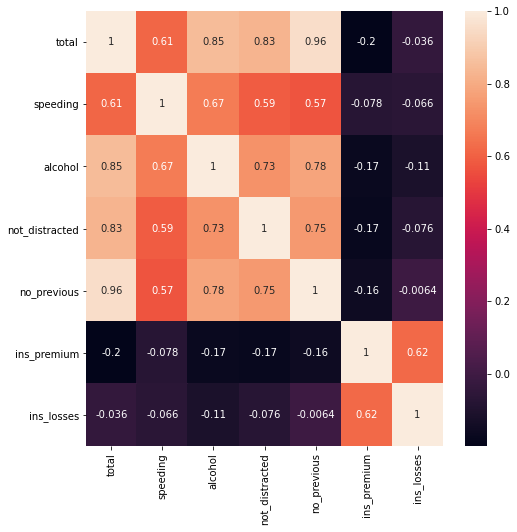

In [12]:
# 2. Creating a heatmap
plt.figure(figsize=(8,8))
sns.heatmap(crash_mx,
            annot=True,    # numbers in the middle
            cmap='rocket')    # palette

#### 1.2 Using Pivot

In [14]:
# Upload dataset
flights = sns.load_dataset('flights')
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [17]:
# Pivot
flights_pt = flights.pivot_table(index='month', columns='year', values='passengers')
flights_pt

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


<AxesSubplot:xlabel='year', ylabel='month'>

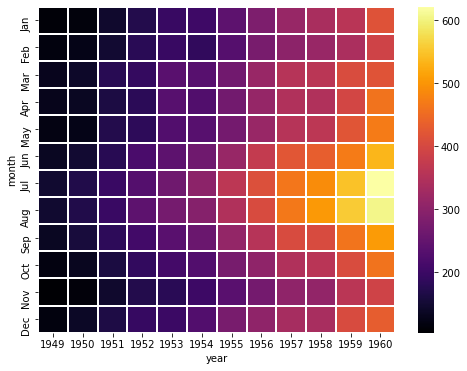

In [29]:
# Plot
plt.figure(figsize=(8,6))
sns.heatmap(flights_pt, 
            cmap='inferno',
            linecolor='white', linewidth=1)    # divide each square

---
### 2. Pair Grid (Customized pair plots)

In [35]:
# Upload dataset
iris_df = sns.load_dataset('iris')
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


#### 2.1 Same plots

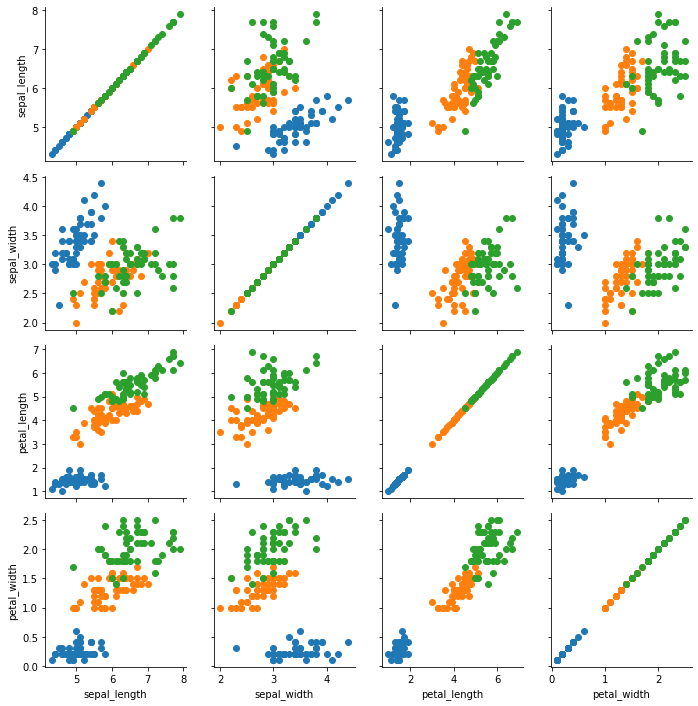

In [50]:
# 1. Create a empty Grid structure
iris_g = sns.PairGrid(iris_df, hue='species')

# 2. Map
iris_g.map(plt.scatter)    # put scatter plot in all the grids

#### 2.2 Different on diagonal

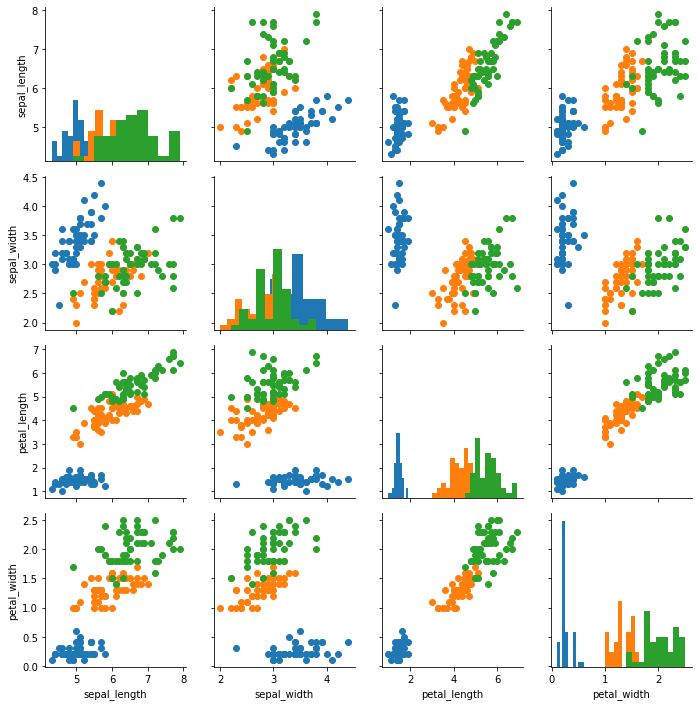

In [48]:
# 1. Create a empty Grid structure
iris_g = sns.PairGrid(iris_df, hue='species')

# 2. Map
iris_g.map_diag(plt.hist)    # histogram on diagonal
iris_g.map_offdiag(plt.scatter)    # scatter plot on the rest of diagonal

#### 2.2 Upper, lower and diagonal are different plots

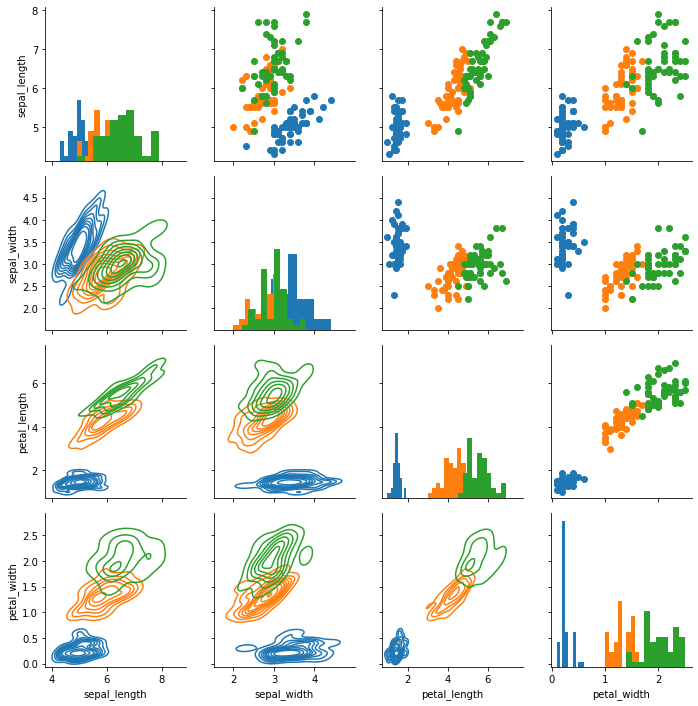

In [47]:
# 1. Create a empty Grid structure
iris_g = sns.PairGrid(iris_df, hue='species')

# 2. Map
iris_g.map_diag(plt.hist)    # histogram on diagonal
iris_g.map_upper(plt.scatter)    # scatter on the top
iris_g.map_lower(sns.kdeplot)    # kde on the bottom

#### 2.3 Custome Pair Grid

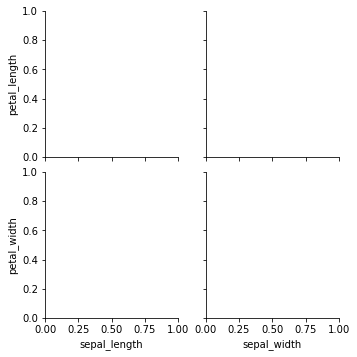

In [72]:
# 1. Create the structure iris_pg
iris_pg = sns.PairGrid(iris_df, hue='species',
                      x_vars = ['sepal_length', 'sepal_width'],
                      y_vars = ['petal_length', 'petal_width'])

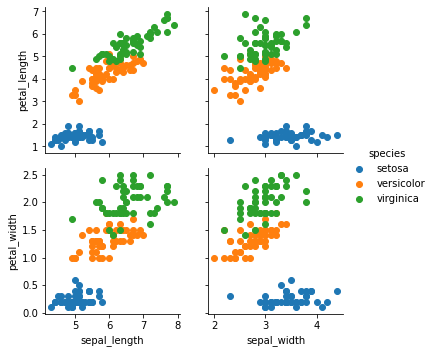

In [73]:
# 2. Map a plot
iris_pg.map(plt.scatter)

# 3. Add a legend
iris_pg.add_legend()

---
# Facet Grid
### E
Multiple plots in a grid

In [60]:
tips_df = sns.load_dataset('tips')
tips_df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


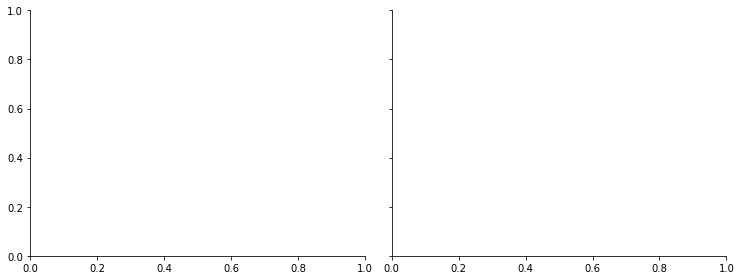

In [99]:
# 1. Create a grid
tips_fg = sns.FacetGrid(tips_df, col='time', hue='smoker',    # axises, add 'row' instead of 'hue'
                        height=4, aspect=1.3,    # size of a grid
                        col_order=['Dinner', 'Lunch'],    # grid position        
                        palette='inferno')    

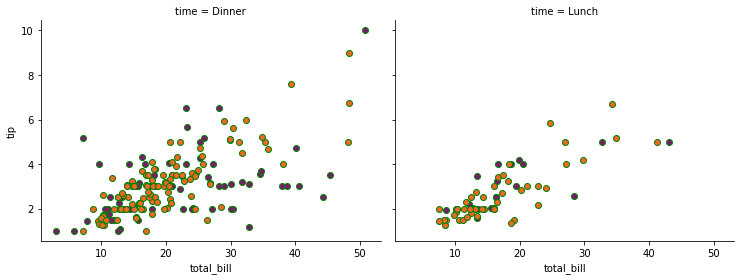

In [100]:
# 2. Map a plot
tips_fg.map(plt.scatter, 'total_bill', 'tip',
            edgecolor='green')

# Facet Grid - Example 2

In [108]:
att_df = sns.load_dataset('attention')
att_df.head()

,Unnamed: 0,subject,attention,solutions,score
0,0,1,divided,1,2.0
1,1,2,divided,1,3.0
2,2,3,divided,1,3.0
3,3,4,divided,1,5.0
4,4,5,divided,1,4.0


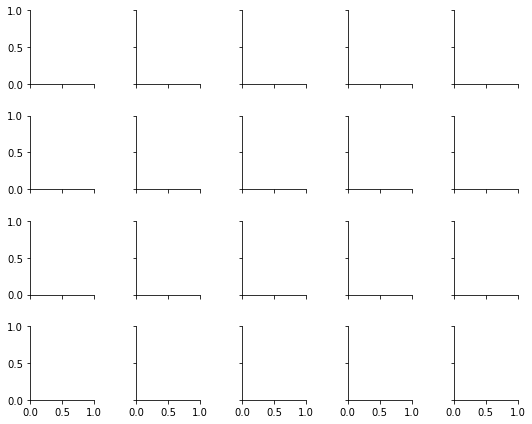

In [109]:
# One grid for every student
att_fg = sns.FacetGrid(att_df, 
                       col='subject',    # students
                       col_wrap=5,    # number of students
                       height=1.5)

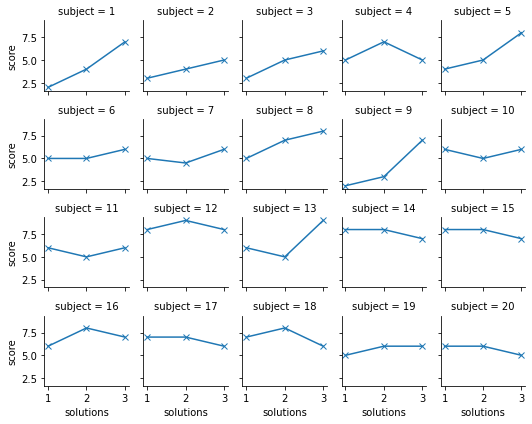

In [105]:
att_fg.map(plt.plot, 'solutions', 'score', marker='x')

---
# Regression Plots

In [110]:
tips_df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<Figure size 576x432 with 0 Axes>

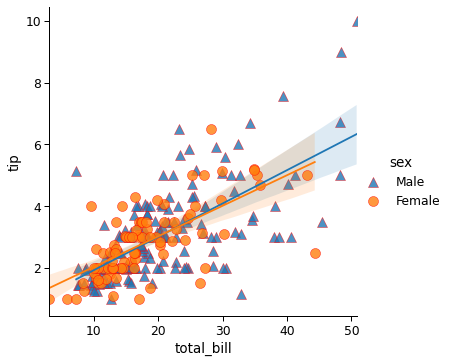

In [123]:
plt.figure(figsize=(8,6))
sns.set_context('paper', font_scale=1.4)

sns.lmplot(data=tips_df, 
           x='total_bill', y='tip', 
           hue='sex',
           markers=['^', 'o'],
           scatter_kws={'s':100, 'linewidth':0.5, 'edgecolor':'red'}    # marker size and line width and edge color
           )

Example 2

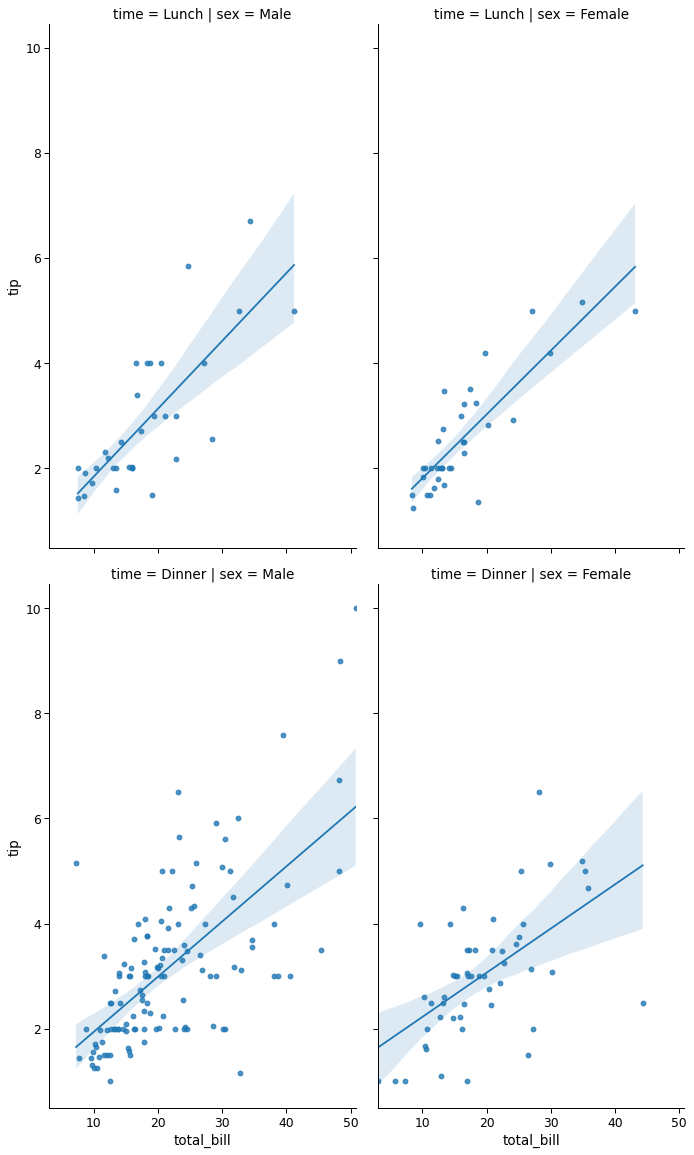

In [127]:
sns.lmplot(data=tips_df, 
           x='total_bill', y='tip', 
           col='sex', row='time',
           height=8, aspect=0.6)    # change size of the grids